In [1]:
from scipy.stats import norm
import numpy as np

In [2]:
# If the prior dataset follows normal distribution

mean = 3 # the mean of the prior dataset
std = 2 # the std of the prior dataset
obs = 1 # Let's say 

In [3]:
rv = norm(loc=mean, scale=std) # assume that your prior data follow a normal distribution
prob = rv.cdf(obs) # cumulative distribution function
print(prob)

0.15865525393145707


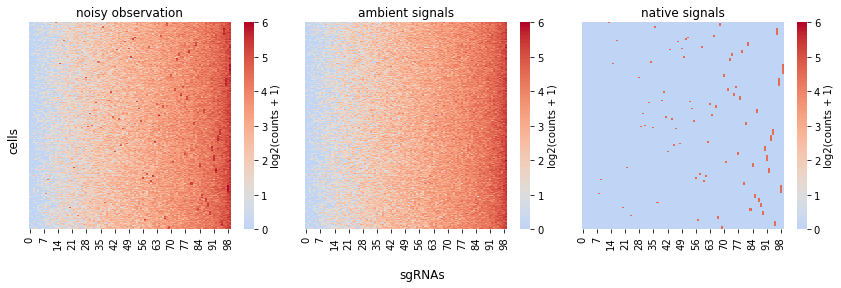

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scar import data_generator, model

n_features = 100  # 100 sgRNAs in the libraries
n_cells = 6000  # 6000 cells
n_celltypes = 1  # single cell line

# generate a synthetic sgRNA count dataset
np.random.seed(8)
cropseq = data_generator.cropseq(n_cells, n_celltypes, n_features)
cropseq.generate(noise_ratio=0.975)
cropseq.heatmap(vmax=6)

In [18]:
from scar import model

sgRNAs = model(raw_count = cropseq.obs_count,
               ambient_profile = cropseq.ambient_profile,
               feature_type = 'sgRNAs')

sgRNAs.train(epochs=100,
             batch_size=64,
             verbose=True
            )

sgRNAs.inference(cutoff=3)

..Running VAE using the following param set:
......denoised count type:  sgRNAs
......count model:  binomial
......num_input_feature:  100
......NN_layer1:  150
......NN_layer2:  100
......latent_space:  15
......dropout_prob:  0
......expected data sparsity:  1
......kld_weight:  1e-05
......lr:  0.001
......lr_step_size:  5
......lr_gamma:  0.97
  Training.....
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [03:14<00:00,  1.94s/it]
  Inferring .....


In [19]:
(cropseq.celltype == sgRNAs.feature_assignment["sgRNAs"]).sum() / n_cells

0.9643333333333334

In [122]:
sgRNAs.native_counts

array([[ 1.,  0.,  1., ...,  1.,  3.,  1.],
       [ 0.,  3.,  1., ...,  0.,  8.,  2.],
       [ 0.,  1.,  0., ...,  0.,  3.,  0.],
       ...,
       [ 0.,  1.,  0., ...,  1.,  2., 18.],
       [ 0.,  2.,  1., ...,  2.,  5.,  0.],
       [ 0.,  2.,  0., ...,  2.,  4.,  2.]])

In [126]:
pred_native[~tmp.isna()[range(n_features)]]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0
5998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
pred_native

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.0,0.0,1.0,1.0,5.0,2.0,0.0,0.0,2.0,0.0,...,1.0,0.0,1.0,2.0,0.0,2.0,2.0,1.0,3.0,1.0
1,0.0,3.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0
2,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,...,0.0,0.0,3.0,0.0,0.0,3.0,1.0,0.0,3.0,0.0
3,2.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,1.0,0.0,0.0,16.0,0.0,0.0,1.0,0.0,1.0,...,0.0,3.0,4.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
5996,0.0,2.0,0.0,0.0,3.0,1.0,1.0,4.0,0.0,0.0,...,0.0,2.0,3.0,0.0,0.0,0.0,0.0,2.0,14.0,3.0
5997,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,18.0
5998,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,10.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0


In [140]:
import spreen as sn
sn.pl.set_figure_params()

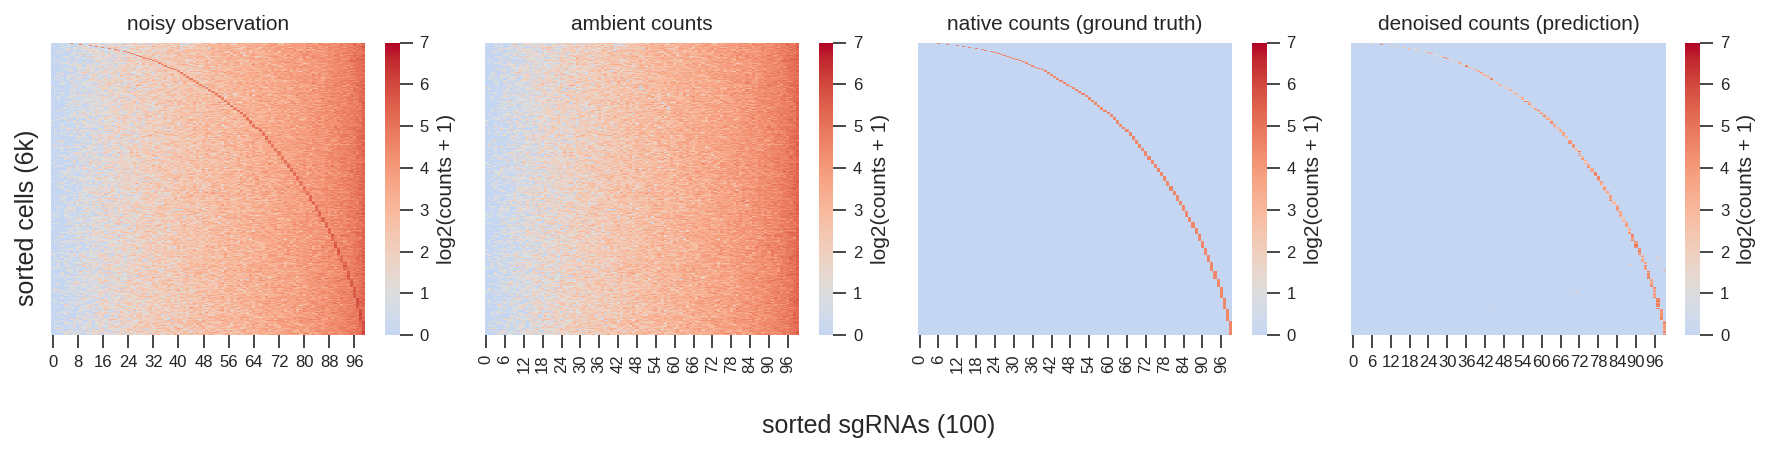

In [145]:
import pandas as pd
figsize=(12, 3)
vmin=0
vmax=7
feature_type = 'sgNRAs' 

sort_cell_idx = []
for f in cropseq.ambient_profile.argsort():
    sort_cell_idx += list(np.where(cropseq.celltype == f)[0])

native_signals = cropseq.native_signals[
    :, cropseq.ambient_profile.argsort()
][sort_cell_idx]#[cropseq.celltype.argsort()]


ambient_signals = cropseq.ambient_signals[
    :, cropseq.ambient_profile.argsort()
][sort_cell_idx]#[cropseq.celltype.argsort()]



tmp = sgRNAs.feature_assignment[["sgRNAs"]].rename_axis("cells").reset_index()
tmp["values"] = 1
tmp = tmp.pivot(index='cells', columns='sgRNAs')
tmp.columns=tmp.columns.get_level_values(1)


pred_native = pd.DataFrame(sgRNAs.native_counts, index=range(n_cells), columns=range(n_features))
pred_native = pred_native[~tmp.isna()[range(n_features)]]
pred_native = pred_native.fillna(0)

pred = pred_native.values[
    :, cropseq.ambient_profile.argsort()
][sort_cell_idx]#[cropseq.celltype.argsort()]


obs = cropseq.obs_count[:, cropseq.ambient_profile.argsort()][sort_cell_idx]#[cropseq.celltype.argsort()]

fig, axs = plt.subplots(ncols=4, figsize=figsize)
sns.heatmap(
    np.log2(obs + 1),
    yticklabels=False,
    vmin=vmin,
    vmax=vmax,
    cmap="coolwarm",
    center=1,
    ax=axs[0],
    rasterized=True,
    cbar_kws={"label": "log2(counts + 1)"},
)
axs[0].set_title("noisy observation")

sns.heatmap(
    np.log2(ambient_signals + 1),
    yticklabels=False,
    vmin=vmin,
    vmax=vmax,
    cmap="coolwarm",
    center=1,
    ax=axs[1],
    rasterized=True,
    cbar_kws={"label": "log2(counts + 1)"},
)
axs[1].set_title("ambient counts")

sns.heatmap(
    np.log2(native_signals + 1),
    yticklabels=False,
    vmin=vmin,
    vmax=vmax,
    cmap="coolwarm",
    center=1,
    ax=axs[2],
    rasterized=True,
    cbar_kws={"label": "log2(counts + 1)"},
)
axs[2].set_title("native counts (ground truth)")

sns.heatmap(
    np.log2(pred + 1),
    yticklabels=False,
    vmin=vmin,
    vmax=vmax,
    cmap="coolwarm",
    center=1,
    ax=axs[3],
    rasterized=True,
    cbar_kws={"label": "log2(counts + 1)"},
)
axs[3].set_title("denoised counts (prediction)")

fig.supxlabel("sorted sgRNAs (100)")
fig.supylabel("sorted cells (6k)")
plt.tight_layout()
plt.savefig("synthetic_cropseq.pdf")

In [148]:
sparsity = 0.6

In [163]:
# Synthetic data
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scar import data_generator, model

# Generate a synthetic ADT count dataset
np.random.seed(8)
n_features = 50  # 50 ADTs
n_cells = 6000  # 6000 cells
n_celltypes = 6  # cell types
sparsity = 1

citeseq = data_generator.citeseq(n_cells, n_celltypes, n_features)
citeseq.generate()

# Train scAR
citeseq_denoised = model(citeseq.obs_count, citeseq.ambient_profile, feature_type="ADT", sparsity=sparsity)  # initialize scar model
citeseq_denoised.train(epochs=100, verbose=False)  # start training
citeseq_denoised.inference()  # inference

  Training.....
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [03:09<00:00,  1.90s/it]
  Inferring .....


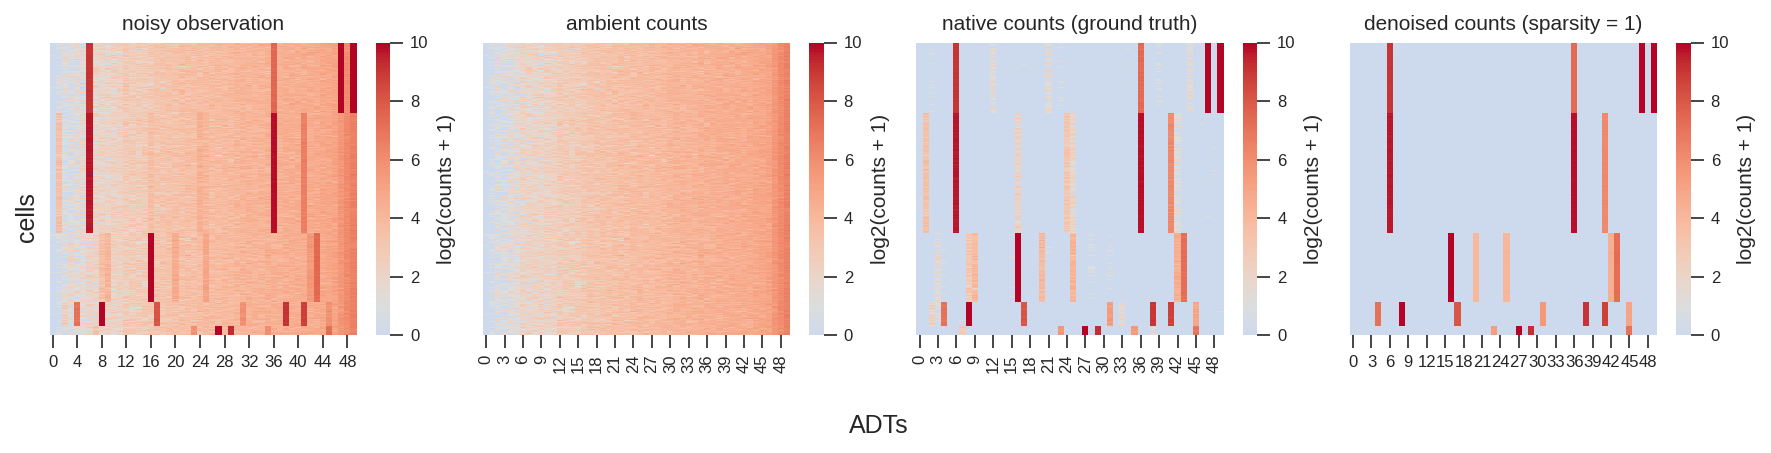

In [164]:
# Visualization
sorted_noisy_counts = citeseq.obs_count[citeseq.celltype.argsort()][
            :, citeseq.ambient_profile.argsort()
        ]  # noisy observation
sorted_ambient_signals = citeseq.ambient_signals[citeseq.celltype.argsort()][
            :, citeseq.ambient_profile.argsort()
        ]  # native counts

sorted_native_counts = citeseq.native_signals[citeseq.celltype.argsort()][
            :, citeseq.ambient_profile.argsort()
        ]  # native counts

sorted_denoised_counts = citeseq_denoised.native_counts[citeseq.celltype.argsort()][
            :, citeseq.ambient_profile.argsort()
        ]  # denoised counts

fig, axs = plt.subplots(ncols=4, figsize=(12,3))
sns.heatmap(
            np.log2(sorted_noisy_counts + 1),
            yticklabels=False,
            vmin=0,
            vmax=10,
            cmap="coolwarm",
            center=1,
            ax=axs[0],
            rasterized=True,
            cbar_kws={"label": "log2(counts + 1)"},
        )
axs[0].set_title("noisy observation")

sns.heatmap(
            np.log2(sorted_ambient_signals + 1),
            yticklabels=False,
            vmin=0,
            vmax=10,
            cmap="coolwarm",
            center=1,
            ax=axs[1],
            rasterized=True,
            cbar_kws={"label": "log2(counts + 1)"},
        )
axs[1].set_title("ambient counts")

sns.heatmap(
            np.log2(sorted_native_counts + 1),
            yticklabels=False,
            vmin=0,
            vmax=10,
            cmap="coolwarm",
            center=1,
            ax=axs[2],
            rasterized=True,
            cbar_kws={"label": "log2(counts + 1)"},
        )
axs[2].set_title("native counts (ground truth)")

sns.heatmap(
            np.log2(sorted_denoised_counts + 1),
            yticklabels=False,
            vmin=0,
            vmax=10,
            cmap="coolwarm",
            center=1,
            ax=axs[3],
            rasterized=True,
            cbar_kws={"label": "log2(counts + 1)"},
        )
axs[3].set_title(f"denoised counts (sparsity = {sparsity})")

fig.supxlabel("ADTs")
fig.supylabel("cells")
plt.tight_layout()
plt.savefig(f"citeseq_{sparsity}.pdf")

In [167]:
import scar
import torch

In [201]:
out_dict = {}
for s in [0, 0.25, 0.5, 0.75, 1]:
    mysoftplus = scar.main._activation_functions.mysoftplus(sparsity=s)
    input_x = torch.linspace(-5, 1, 100)
    output = mysoftplus(input_x).numpy()
    out_dict.update({s: output})

In [202]:
out_df = pd.DataFrame(out_dict)
out_df["x"] = input_x.numpy()

In [203]:
out_df = out_df.melt(id_vars="x", var_name="sparsity", value_name="output")

Text(-2, 0.6, '[0, inf)')

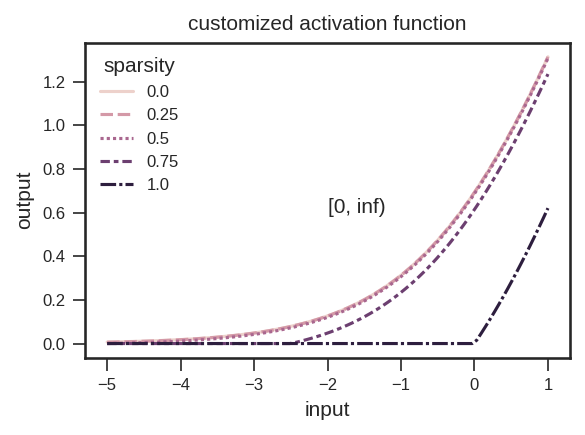

In [210]:
ax = sns.lineplot(x="x", y="output", hue='sparsity', style="sparsity", data=out_df)
ax.set_xlabel("input")
ax.set_title("customized activation function")
ax.text(-2, 0.6, "[0, inf)")